# 미니 프로젝트 : 가위바위보 분류기 만들기

## 1. 데이터 Resize 하기

1). 라이브러리 불러오기

In [1]:
from PIL import Image
import glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


2). 28x28로 Resize 하기

In [2]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

356  images to be resized.
356  images resized.
가위 이미지 resize 완료!


In [3]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [4]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

354  images to be resized.
354  images resized.
보 이미지 resize 완료!


## 함수를 통한 라벨링하기

In [5]:
import numpy as np

def load_data(img_path, number_of_data=813):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

데이터의 이미지 개수는 811 입니다.
x_train shape: (813, 28, 28, 3)
y_train shape: (813,)


이미지 테스트

라벨:  0


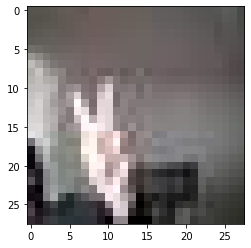

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## 딥러닝 네트워크 설계

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np



n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=15

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

딥러닝 네트워크 학습시키기

In [8]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(x_train_norm, y_train, epochs = 10)

Epoch 1/10
26/26 [==============================] - 3s 9ms/step - loss: 0.9654 - accuracy: 0.5055
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 0.7675 - accuracy: 0.6913
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 0.5606 - accuracy: 0.7847
Epoch 4/10
26/26 [==============================] - 0s 3ms/step - loss: 0.4262 - accuracy: 0.8475
Epoch 5/10
26/26 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8868
Epoch 6/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2866 - accuracy: 0.8770
Epoch 7/10
26/26 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.9114
Epoch 8/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2226 - accuracy: 0.9151
Epoch 9/10
26/26 [==============================] - 0s 3ms/step - loss: 0.2034 - accuracy: 0.9311
Epoch 10/10
26/26 [==============================] - 0s 3ms/step - loss: 0.1884 - accuracy: 0.9323


# 테스트하기

테스트 이미지 Resize


In [9]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor_test"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

121  images to be resized.
121  images resized.
가위 이미지 resize 완료!


In [10]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock_test"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

105  images to be resized.
105  images resized.
바위 이미지 resize 완료!


In [11]:
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper_test"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

106  images to be resized.
106  images resized.
보 이미지 resize 완료!


In [12]:
import numpy as np

def load_data(img_path, number_of_data=332):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("데이터의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_train.shape))
print("y_test shape: {}".format(y_train.shape))

데이터의 이미지 개수는 332 입니다.
x_test shape: (813, 28, 28, 3)
y_test shape: (813,)


불러온 이미지 확인해보기

라벨:  0


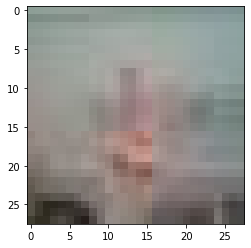

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0])
print('라벨: ', y_test[0])

모델 테스트

In [14]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11/11 - 0s - loss: 2.2641 - accuracy: 0.5000
test_loss: 2.264143466949463 
test_accuracy: 0.5


# 회고

1. 좋았던 점 : 처음엔 코드만 보면 속이 답답하고 Run을 누르는 순간 error만 나올
                까봐 무섭기만했는데 주변 팀원분들과 고충을 나누며 결과물을 완성하
                니 흥미가 많이 생기고 코딩과 조금 친해진거 같다.
2. 아쉬운 점 : 시간이 없다는 핑계로 이해가 가지 않는 줄도 세심하게 찾아보지 못하고                완성에 조금 조급했던 것 같다. 다음부터는 시간적 여유를 가지고
               미리미리 모르는 부분에 대해 찾아보고 더 열심히 해야할 것 같다.